In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import mlgrad.af as af
import mlgrad.func as func
import mlgrad.utils as utils
import mlgrad.pca as pca

from sklearn.preprocessing import robust_scale, scale
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine


In [2]:
X0, Y0 = load_wine(return_X_y=True)
X0 = scale(X0)
N = len(X0)
n = X0.shape[1]
print(X0.shape)

(178, 13)


In [3]:
pca_sk = PCA()
U0 = pca_sk.fit_transform(X0)

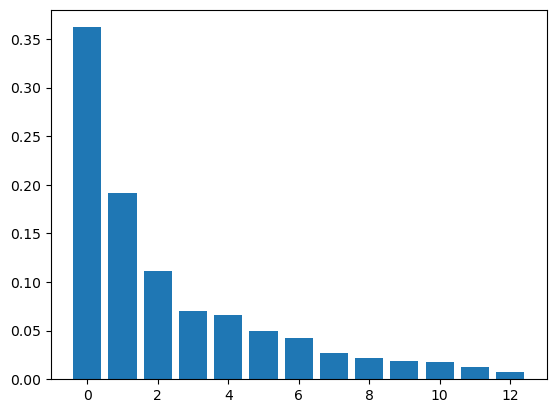

In [4]:
plt.bar(range(n), pca_sk.explained_variance_ratio_)
plt.show()

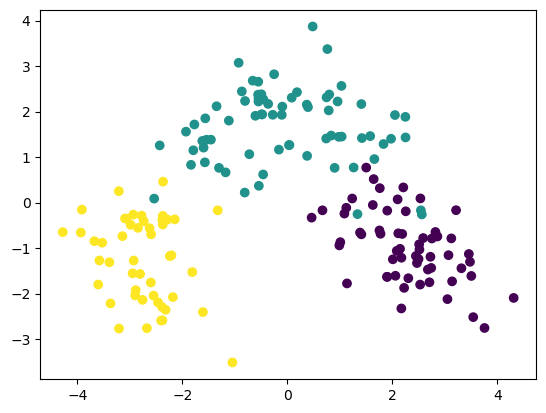

In [5]:
plt.scatter(U0[:,0], U0[:,1], c=Y0)
plt.show()

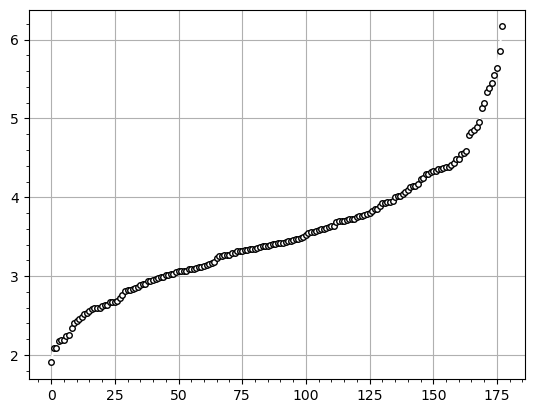

[ 7.841e-15  2.445e-16 -4.059e-15 -7.110e-17 -2.495e-17 -1.955e-16
  9.443e-16 -4.179e-16 -1.541e-15 -4.129e-16  1.398e-15  2.127e-15
 -6.986e-17]


In [6]:
c0 = pca.location(X0)
plt.plot(sorted(pca.distance_center(X0, c0)), marker='o', markersize=4, mfc='w', mec='k', c='w')
# plt.hist(pca.distance_center(X0, c0), bins=40, rwidth=0.9)
plt.grid(1)
plt.minorticks_on()
plt.show()
print(c0)

0.9157303370786517
[ 7.841e-15  2.445e-16 -4.059e-15 -7.110e-17 -2.495e-17 -1.955e-16
  9.443e-16 -4.179e-16 -1.541e-15 -4.129e-16  1.398e-15  2.127e-15
 -6.986e-17]


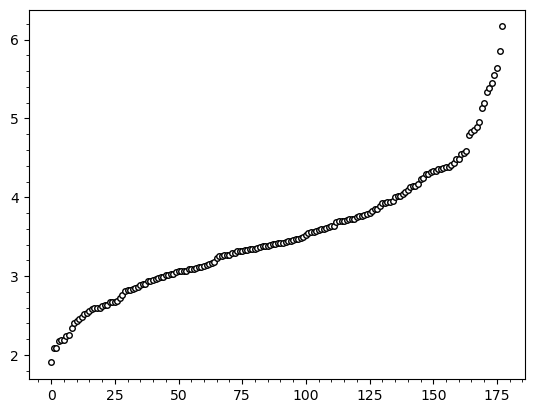

In [51]:
N = len(X0)
alpha = (N - 15) / N
print(alpha)
wma = af.averaging_function("WM", rhofunc=func.Quantile_Sqrt(alpha, 0.001))
c = pca.robust_location(X0, wma)
print(c)
plt.plot(sorted(pca.distance_center(X0, c)), marker='o', markersize=4, mfc='w', mec='k', c='w')
# plt.hist(pca.distance_center(X0, c), bins=30, rwidth=0.9)
plt.minorticks_on()
plt.show()

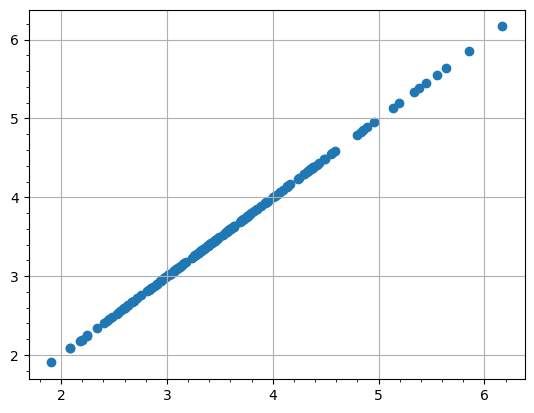

In [52]:
D0 = pca.distance_center(X0, c0)
D1 = pca.distance_center(X0, c)
plt.scatter(D0, D1)
plt.minorticks_on()
plt.grid(1)
plt.show()

In [53]:
X1_0 = X0 - c0
X1 = X0 - c

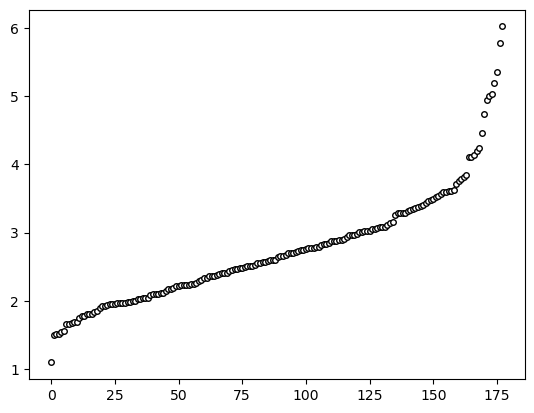

4.705850252966262 [ 0.144 -0.245 -0.002 -0.239  0.142  0.395  0.423 -0.299  0.313 -0.089
  0.297  0.376  0.287]


In [54]:
a1_0, L1_0 = pca.find_pc(X1_0)
# plt.figure(figsize=(10,8))
plt.plot(sorted(pca.distance_line(X1_0, a1_0)), marker='o', markersize=4, mfc='w', mec='k', c='w')
# plt.hist(pca.distance_center(X1_0, a1_0), bins=30, rwidth=0.9)
plt.show()
print(L1_0, a1_0)

0.9157303370786517
4.6036287144963515 [ 0.226 -0.221 -0.017 -0.311  0.136  0.405  0.420 -0.295  0.297 -0.017
  0.232  0.334  0.323]


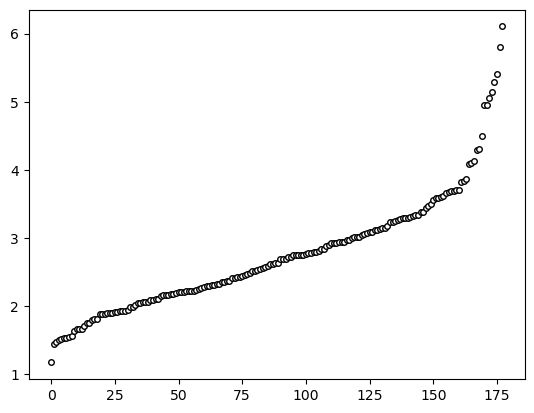

In [55]:
N = len(X0)
alpha = (N - 15) / N
print(alpha)
wma = af.averaging_function("WM", rhofunc=func.Quantile_Sqrt(alpha, 0.001))
a1, L1 = pca.find_robust_pc(X1, wma)
print(L1, a1)
# plt.figure(figsize=(10,8))
plt.plot(sorted(pca.distance_line(X1, a1)), marker='o', markersize=4, mfc='w', mec='k', c='w')
# plt.hist(pca.distance_center(X1, a1), bins=30, rwidth=0.9)
plt.show()
U1 = pca.project_line(X1_0, a1)
U1_0 = pca.project_line(X1, a1_0)

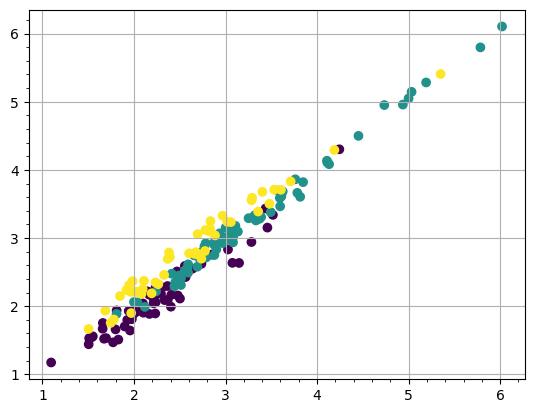

In [56]:
plt.scatter(pca.distance_line(X1_0, a1_0), pca.distance_line(X1, a1), c=Y0)
plt.minorticks_on()
plt.grid(1)
plt.show()

In [57]:
X2_0 = pca.project(X1_0, a1_0)
X2 = pca.project(X1, a1)

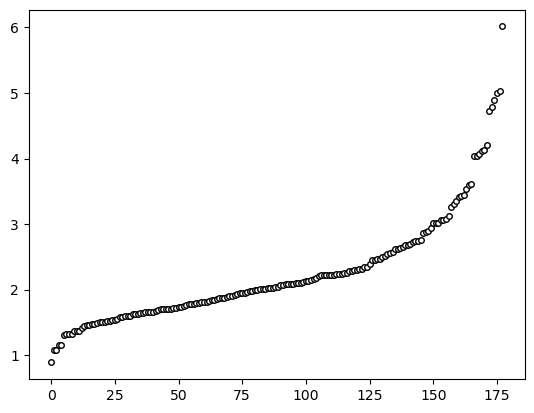

2.4969737334298934 [ 0.484  0.225  0.316 -0.011  0.300  0.065 -0.003  0.029  0.039  0.530
 -0.279 -0.164  0.365]


In [58]:
a2_0, L2_0 = pca.find_pc(X2_0)
# plt.figure(figsize=(10,8))
plt.plot(sorted(pca.distance_line(X2_0, a2_0)), marker='o', markersize=4, mfc='w', mec='k', c='w')
# plt.hist(pca.distance_line(X2_0, a2_0), bins=30, rwidth=0.9)
plt.show()
print(L2_0, a2_0)

0.9157303370786517


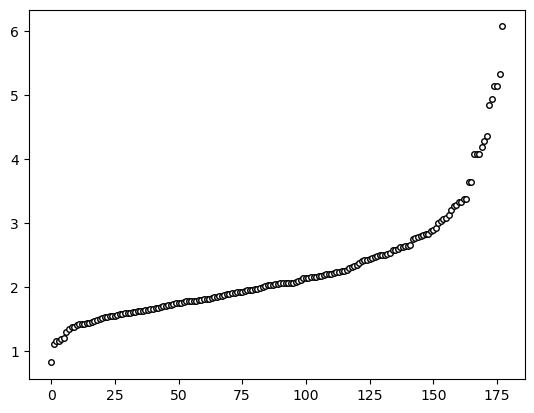

2.317662497979081 [ 0.464  0.289  0.219 -0.065  0.311 -0.014 -0.073  0.011 -0.023  0.520
 -0.328 -0.232  0.337]


In [59]:
N = len(X0)
alpha = (N - 15) / N
print(alpha)
wma = af.averaging_function("WM", rhofunc=func.Quantile_Sqrt(alpha, 0.001))
a2, L2 = pca.find_robust_pc(X2, wma)
# plt.figure(figsize=(10,8))
plt.plot(sorted(pca.distance_line(X2, a2)), marker='o', markersize=4, mfc='w', mec='k', c='w')
# plt.hist(pca.distance_line(X2, a2), bins=30, rwidth=0.9)
plt.show()
print(L2, a2)
U2 = pca.project_line(X2, a2)
U2_0 = pca.project_line(X2_0, a2_0)

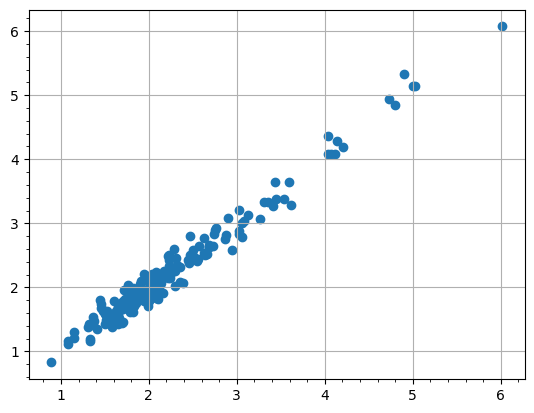

In [60]:
plt.scatter(pca.distance_line(X2_0, a2_0), pca.distance_line(X2, a2))
plt.minorticks_on()
plt.grid(1)
plt.show()

In [61]:
from sklearn.decomposition import PCA

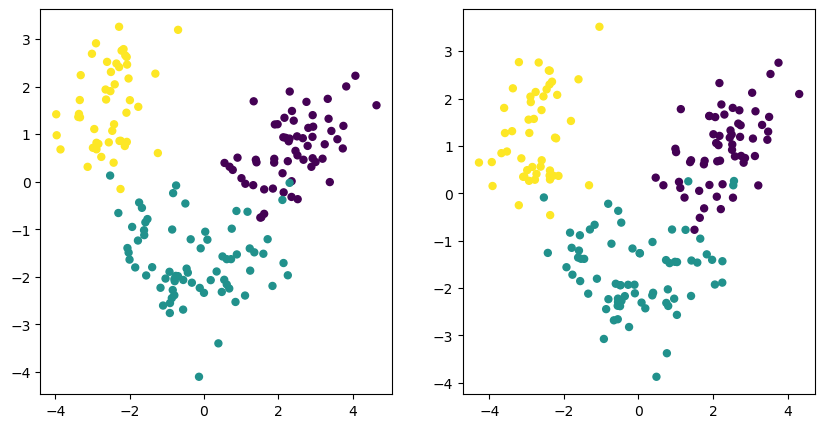

In [62]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(U1, U2, c=Y0, s=25)
plt.subplot(1,2,2)
plt.scatter(U1_0, U2_0, c=Y0, s=25)
plt.show()

In [19]:
As_0, Ls_0, Us_0 = pca.find_pc_all(X1_0)

In [20]:
N = len(X1)
alpha = (N - 10) / N
print(alpha)
wma = af.averaging_function("WM", rhofunc=func.Quantile_Sqrt(alpha, 0.001))
As, Ls, Us = pca.find_robust_pc_all(X1, wma)

0.9438202247191011


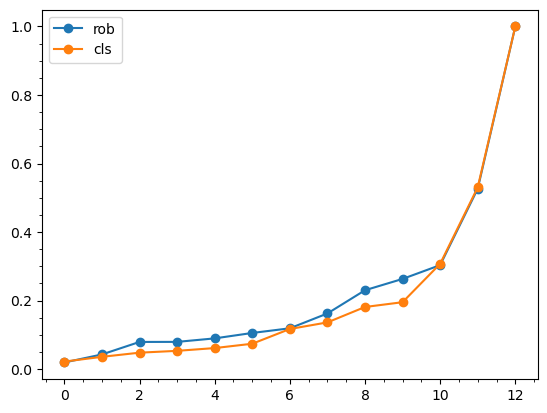

In [21]:
plt.plot(sorted(Ls/Ls.max()), marker='o', label='rob')
plt.plot(sorted(Ls_0/Ls_0.max()), marker='o', label='cls')
plt.legend()
plt.minorticks_on()
plt.show()

In [22]:
Vs = np.array([np.var(U) for U in Us])
Vs_0 = np.array([np.var(U) for U in Us_0])
Vs /= Vs.sum()
Vs_0 /= Vs_0.sum()

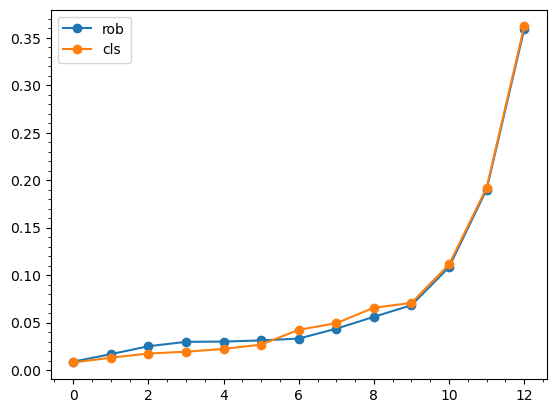

In [23]:
plt.plot(sorted(Vs), marker='o', label='rob')
plt.plot(sorted(Vs_0), marker='o', label='cls')
plt.legend()
plt.minorticks_on()
plt.show()

In [24]:
from mlgrad.pca.location_scatter import robust_scatter_matrix

In [25]:
S = robust_scatter_matrix(X1, wma)
# print(S)

[[ 1.375e+00 -2.965e-01  6.110e-02  1.895e-01 -6.194e-02  9.455e-02
  -4.371e-01 -1.332e-01  2.225e-01 -6.267e-01  2.963e-02 -2.054e-01
  -5.462e-01]
 [-2.965e-01  9.100e-01 -1.308e-01 -5.603e-02  5.613e-02 -8.074e-02
   3.309e-01 -8.404e-02 -1.472e-01  8.973e-02  3.965e-01 -3.034e-02
   1.412e-01]
 [ 6.110e-02 -1.308e-01  1.268e+00 -7.035e-01 -6.210e-01 -5.148e-02
  -1.070e-01 -1.924e-01  1.094e-02  7.268e-02 -3.580e-02 -2.560e-02
  -4.238e-01]
 [ 1.895e-01 -5.603e-02 -7.035e-01  1.386e+00  2.191e-01  8.668e-02
   2.237e-01 -5.463e-02 -9.455e-02 -2.819e-02  1.027e-01 -6.965e-03
   4.023e-01]
 [-6.194e-02  5.613e-02 -6.210e-01  2.191e-01  1.027e+00 -1.203e-01
   3.564e-01  4.562e-01 -6.242e-02  1.344e-03 -3.395e-02  2.012e-01
  -8.667e-02]
 [ 9.455e-02 -8.074e-02 -5.148e-02  8.668e-02 -1.203e-01  2.609e+00
  -2.270e+00 -2.301e-01  1.036e-01 -2.715e-01  8.219e-02 -4.142e-01
  -7.786e-02]
 [-4.371e-01  3.309e-01 -1.070e-01  2.237e-01  3.564e-01 -2.270e+00
   4.767e+00  4.092e-01 -1.056e+

In [26]:
L, A = np.linalg.eig(S)
# print(A)
print(L/L.sum())

[0.298 0.144 0.120 0.096 0.086 0.071 0.061 0.045 0.005 0.010 0.014 0.027
 0.023]
